In [53]:
import pandas as pd
import pvlib
import matplotlib.pyplot as plt
import numpy as np

solcast_file = "/home/joaoantoniocardoso/workspace_TCC/repo/code/models/Competition/datasets/-26.243602_-48.6417668_Solcast_PT5M.csv"

site = pvlib.location.Location(
    latitude=-26.243602,
    longitude=-48.6417668,
    tz="America/Sao_Paulo",
    altitude=0,
    name="São Francisco do Sul",
)
display(site)

df = pd.read_csv(solcast_file, index_col="PeriodStart")
df

Location: 
  name: São Francisco do Sul
  latitude: -26.243602
  longitude: -48.6417668
  altitude: 0
  tz: America/Sao_Paulo

,PeriodEnd,Period,AirTemp,AlbedoDaily,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowDepth,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
PeriodStart,,,,,,,,,,,,,,,,,,,,
2020-01-26T00:10:00Z,2020-01-26T00:15:00Z,PT5M,21.6,0.1,129,0.0,19.5,0,0,0,0,0,0,27.4,87.6,0.0,1007.4,49,1.3,115
2020-01-26T00:15:00Z,2020-01-26T00:20:00Z,PT5M,21.6,0.1,130,0.0,19.5,0,0,0,0,0,0,27.5,87.7,0.0,1007.5,49,1.3,116
2020-01-26T00:20:00Z,2020-01-26T00:25:00Z,PT5M,21.6,0.1,131,0.0,19.5,0,0,0,0,0,0,27.5,87.8,0.0,1007.5,49,1.3,116
2020-01-26T00:25:00Z,2020-01-26T00:30:00Z,PT5M,21.5,0.1,132,0.0,19.4,0,0,0,0,0,0,27.6,87.9,0.0,1007.6,50,1.3,117
2020-01-26T00:30:00Z,2020-01-26T00:35:00Z,PT5M,21.5,0.1,133,0.0,19.4,0,0,0,0,0,0,27.7,87.9,0.0,1007.7,50,1.3,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-04T22:30:00Z,2020-02-04T22:35:00Z,PT5M,23.1,0.1,112,0.0,21.5,0,0,0,0,0,0,47.8,90.8,0.0,1012.5,96,3.1,97
2020-02-04T22:35:00Z,2020-02-04T22:40:00Z,PT5M,23.1,0.1,113,0.0,21.5,0,0,0,0,0,0,47.9,90.9,0.0,1012.5,96,3.2,98
2020-02-04T22:40:00Z,2020-02-04T22:45:00Z,PT5M,23.0,0.1,113,0.0,21.5,0,0,0,0,0,0,47.9,90.9,0.0,1012.6,96,3.2,99


In [54]:
df.drop(columns=['PeriodEnd', 'Period'], inplace=True)
df.rename(columns={'Dni': 'dni', 'Ghi': 'ghi', 'Dhi': 'dhi', 'Airmass': 'airmass', 'AlbedoDaily': 'albedo'}, inplace=True)
df.index = pd.to_datetime(df.index).tz_convert(site.tz)
df.index.freq = pd.infer_freq(df.index)
df

,AirTemp,albedo,Azimuth,CloudOpacity,DewpointTemp,dhi,dni,Ebh,ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowDepth,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
PeriodStart,,,,,,,,,,,,,,,,,,
2020-01-25 21:10:00-03:00,21.6,0.1,129,0.0,19.5,0,0,0,0,0,0,27.4,87.6,0.0,1007.4,49,1.3,115
2020-01-25 21:15:00-03:00,21.6,0.1,130,0.0,19.5,0,0,0,0,0,0,27.5,87.7,0.0,1007.5,49,1.3,116
2020-01-25 21:20:00-03:00,21.6,0.1,131,0.0,19.5,0,0,0,0,0,0,27.5,87.8,0.0,1007.5,49,1.3,116
2020-01-25 21:25:00-03:00,21.5,0.1,132,0.0,19.4,0,0,0,0,0,0,27.6,87.9,0.0,1007.6,50,1.3,117
2020-01-25 21:30:00-03:00,21.5,0.1,133,0.0,19.4,0,0,0,0,0,0,27.7,87.9,0.0,1007.7,50,1.3,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-04 19:30:00-03:00,23.1,0.1,112,0.0,21.5,0,0,0,0,0,0,47.8,90.8,0.0,1012.5,96,3.1,97
2020-02-04 19:35:00-03:00,23.1,0.1,113,0.0,21.5,0,0,0,0,0,0,47.9,90.9,0.0,1012.5,96,3.2,98
2020-02-04 19:40:00-03:00,23.0,0.1,113,0.0,21.5,0,0,0,0,0,0,47.9,90.9,0.0,1012.6,96,3.2,99


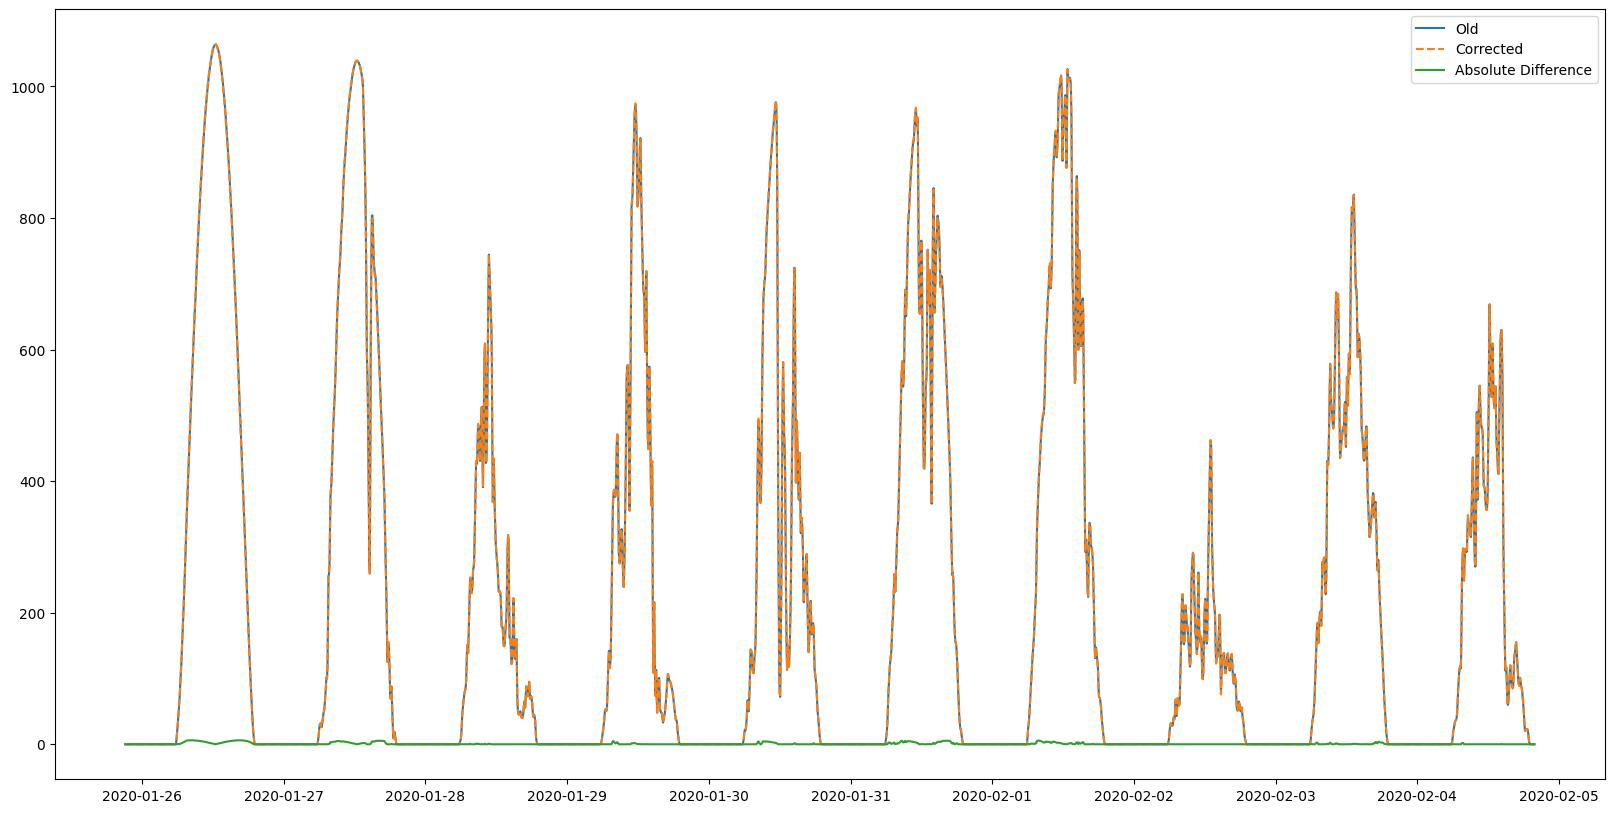

In [71]:
def get_irradiance_old(site_location, surface_tilt, surface_azimuth, weather_data):
    solar_position = site_location.get_solarposition(times=weather_data.index)

    poa_components = pvlib.irradiance.get_total_irradiance(
        surface_tilt=surface_tilt,
        surface_azimuth=surface_azimuth,
        dni=weather_data["dni"],
        ghi=weather_data["ghi"],
        dhi=weather_data["dhi"],
        solar_zenith=solar_position["apparent_zenith"],
        solar_azimuth=solar_position["azimuth"],
    )

    return pd.DataFrame({"POA": poa_components["poa_global"]})

def get_irradiance(site_location, weather_data, surface_tilt, surface_azimuth):
    """
    Get irradiance components to plane-of-array, incorporating
    a timeshift in the solar position calculation of T/2,
    being T the data's period.

    Parameters
    ----------
        weather_data: DataFrame
            Has columns dni, ghi, dhi, albedo
        timeshift: float
            Number of minutes to shift for solar position calculation
    Outputs:
        Series of POA irradiance
    """
    idx = weather_data.index
    data_period = np.diff(df.index[:2])

    # calculate solar position for shifted timestamps:
    idx = idx + (data_period / 2)
    solpos = site_location.get_solarposition(idx)
    # but still report the values with the original timestamps:
    solpos.index = weather_data.index

    dni_extra = pvlib.irradiance.get_extra_radiation(solpos.index)

    air_mass = site_location.get_airmass(times=solpos.index, solar_position=solar_position, model='kastenyoung1989')

    poa_components = pvlib.irradiance.get_total_irradiance(
        surface_tilt=surface_tilt,
        surface_azimuth=surface_azimuth,
        solar_zenith=solpos['apparent_zenith'],
        solar_azimuth=solpos['azimuth'],
        dni=weather_data['dni'],
        ghi=weather_data['ghi'],
        dhi=weather_data['dhi'],
        dni_extra=dni_extra,
        airmass=air_mass,
        albedo=weather_data['albedo'],
        surface_type='sea',
        model='isotropic',
    )
    return pd.DataFrame({"POA": poa_components["poa_global"]})

solar_position = site.get_solarposition(times=df.index)
solar_position

old = get_irradiance_old(site_location=site, surface_tilt=0, surface_azimuth=0, weather_data=df)
new = get_irradiance(site_location=site, surface_tilt=0, surface_azimuth=0, weather_data=df)
diff = np.absolute(new - old)

plt.figure(figsize=(20,10))
plt.plot(old, label='Old')
plt.plot(new, '--', label='Corrected')
plt.plot(diff, label='Absolute Difference')
plt.legend()
plt.show()
